In [1]:
import random
import seaborn as sns
import pandas as pd

In [2]:
all_pcs = [6000, 6005, 6006, 6007, 6008, 6009, 6010, 6011, 6014, 6015, 6017, 6018, 6019, 6020, 6021, 6023, 6024,
                  6025, 6026, 6027, 6028, 6029, 6030, 6035, 6036, 6038, 6041, 6050, 6053, 6054, 6055, 6056, 6058, 6059,
                  6061, 6062, 6063, 6064, 6065,
                  6066, 6069, 6073, 6084, 6090, 6101, 6102, 6103, 6104, 6105, 6107, 6108, 6109, 6110, 6111, 6112, 6123,
                  6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6157, 6159, 6162, 6163, 6164, 6166, 6167, 6168,
                  6170, 6171, 6173, 6208, 6210,
                  6211, 6220, 6230, 6232, 6233, 6237, 6254, 6271, 6280, 6281, 6284, 6312, 6317, 6324, 6330, 6391, 6401,
                  6426, 6430, 6432, 6509, 6528, 6530]

In [3]:
# time_series_25 = []

# for i in range(0,10):
#     sample = random.sample(all_pcs, 75)
#     time_series_25.append(sample)

## Plots and Result Tables

In [4]:
# bottom up aggregation results
hf_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors.csv', index_col=0)

In [5]:
hf_df.head()

,run,sample,category,method,error
0,0,0,0,naive,0.322681
1,0,0,0,arima,0.321692
2,0,0,0,conventional_lstm,0.231297
3,1,0,0,conventional_lstm,0.246363
4,2,0,0,conventional_lstm,0.233219


In [6]:
def get_df_method(approach_df, method_name):
    runs = approach_df.values
    df = []

    for run in range(0,len(runs)):
        df.append([run, 0, 4, method_name, runs[run][0]])
        
    return pd.DataFrame(df, columns=['run', 'sample', 'category', 'method', 'error'])


# methodA 101 results
approachA = pd.read_csv('../swis_combined_nn_results/approachA/SWIS_APPROACH_A_more_layer_without_norm/errors/final_errors.csv', index_col=0)

#methodB 101 results
approachB = pd.read_csv('../swis_combined_nn_results/approachB/SWIS_APPROACH_B/errors/final_errors.csv', index_col=0)

df_A = get_df_method(approachA, 'method-A')
df_B = get_df_method(approachB, 'method-B')

# append these to bottom up table
new_hf_df = hf_df.append(df_A, ignore_index=True)
new_hf_df = new_hf_df.append(df_B, ignore_index=True)

In [7]:
# approachA

In [8]:
# method A category results
methodA_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors_methodA.csv', index_col=0)

# method B category results
methodB_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors_methodB.csv', index_col=0)

In [9]:
# append them together
new_hf_df = new_hf_df.append(methodA_df, ignore_index=True)
new_hf_df = new_hf_df.append(methodB_df, ignore_index=True)

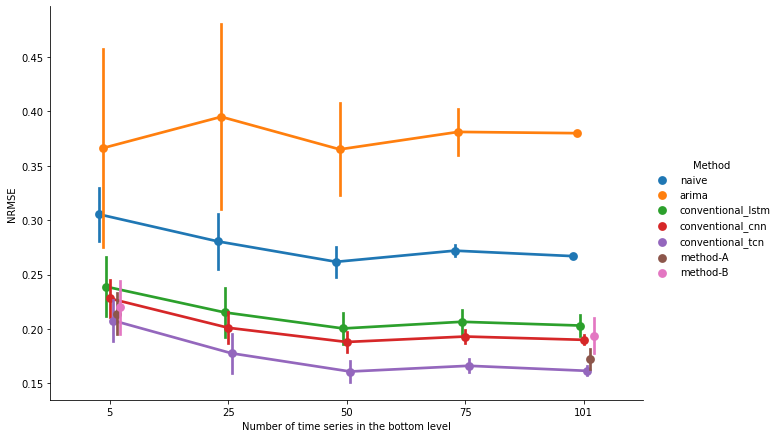

In [10]:
# final plot


plt_all_data = sns.catplot(data=new_hf_df, x='category', y='error', hue='method', kind="point", ci='sd',
                dodge=True, figsize=(20,70), height=6, aspect=1.5)
plt_all_data.set_xticklabels(['5', '25', '50', '75', '101'])
plt_all_data.set(xlabel='Number of time series in the bottom level', ylabel='NRMSE')
plt_all_data._legend.set_title('Method')

In [12]:
#get table - when heirarchy is made of 5 time series
random_sample_5 = new_hf_df.loc[new_hf_df['category'] == 0].groupby(by=['category', 'method']).agg({'error': ['mean', 'median', 'std']})
random_sample_5


error                    
                                mean    median       std
category method                                         
0        arima              0.366216  0.334063  0.096033
         conventional_cnn   0.228080  0.226535  0.016823
         conventional_lstm  0.238886  0.240722  0.027529
         conventional_tcn   0.207779  0.206642  0.018578
         method-A           0.214200  0.216844  0.019048
         method-B           0.219859  0.214827  0.024826
         naive              0.305328  0.313380  0.025897

In [18]:
random_sample_5_samples = new_hf_df.loc[new_hf_df['category'] == 0].groupby(by=['method', 'sample']).agg({'error': ['mean', 'median', 'std']})
random_sample_5_samples

error              
                   mean    median std
method sample                        
arima  0       0.321692  0.321692 NaN
       1       0.339068  0.339068 NaN
       2       0.289876  0.289876 NaN
       3       0.317760  0.317760 NaN
       4       0.388732  0.388732 NaN
...                 ...       ...  ..
naive  5       0.303280  0.303280 NaN
       6       0.306958  0.306958 NaN
       7       0.320470  0.320470 NaN
       8       0.287067  0.287067 NaN
       9       0.324296  0.324296 NaN

[70 rows x 3 columns]

When there are 25 time series

In [13]:
random_sample_25 = new_hf_df.loc[new_hf_df['category'] == 1].groupby(by=['category', 'method']).agg({'error': ['mean', 'median', 'std']})
random_sample_25

error                    
                                mean    median       std
category method                                         
1        arima              0.395008  0.397021  0.089606
         conventional_cnn   0.201140  0.196370  0.014313
         conventional_lstm  0.215254  0.214172  0.022908
         conventional_tcn   0.177676  0.174552  0.018195
         naive              0.280520  0.277697  0.026919

When there are 50 time series

In [14]:
random_sample_50 = new_hf_df.loc[new_hf_df['category'] == 2].groupby(by=['category', 'method']).agg({'error': ['mean', 'median', 'std']})
random_sample_50

error                    
                                mean    median       std
category method                                         
2        arima              0.365072  0.377560  0.044587
         conventional_cnn   0.188082  0.187586  0.008810
         conventional_lstm  0.200503  0.199645  0.014071
         conventional_tcn   0.160939  0.159848  0.009616
         naive              0.261755  0.261812  0.014403

When there are 75 time series

In [15]:
random_sample_75 = new_hf_df.loc[new_hf_df['category'] == 3].groupby(by=['category', 'method']).agg({'error': ['mean', 'median', 'std']})
random_sample_75

error                    
                                mean    median       std
category method                                         
3        arima              0.381111  0.384657  0.022066
         conventional_cnn   0.193086  0.192081  0.005678
         conventional_lstm  0.206627  0.207182  0.010926
         conventional_tcn   0.166191  0.165746  0.006001
         naive              0.271991  0.272757  0.005584

When there are 101 time series

In [16]:
random_sample_101 = new_hf_df.loc[new_hf_df['category'] == 4].groupby(by=['category', 'method']).agg({'error': ['mean', 'median', 'std']})
random_sample_101

error                    
                                mean    median       std
category method                                         
4        arima              0.379956  0.379956       NaN
         conventional_cnn   0.190054  0.188889  0.004253
         conventional_lstm  0.203182  0.202322  0.010369
         conventional_tcn   0.161564  0.160710  0.004206
         method-A           0.172150  0.169410  0.009501
         method-B           0.193992  0.188016  0.017367
         naive              0.266963  0.266963       NaN